In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal3/README.dataset.txt
/kaggle/input/animal3/README.roboflow.txt
/kaggle/input/animal3/data.yaml
/kaggle/input/animal3/valid/labels/00371870727e83d8_jpg.rf.3d483ad1ba638104e43f4c4351baeb3e.txt
/kaggle/input/animal3/valid/labels/G5ESJ9IJTZIN_jpg.rf.c0dcfd5dc9b9740bfbd7c0d4262511fd.txt
/kaggle/input/animal3/valid/labels/82_b0_82b0a9ce-cc43-4eab-b592-86e855a1c4ef_jpg.rf.fe6179c3025787ac51db0318081d1404.txt
/kaggle/input/animal3/valid/labels/dog_cat_317_jpg.rf.9f261f8d5003d55689853f41aa0e3345.txt
/kaggle/input/animal3/valid/labels/2022-02-28_22-41-14_UTC_2_jpg.rf.4d922bafae17f2e1cef3614f476b1bf7.txt
/kaggle/input/animal3/valid/labels/Red_Brocket_Deer_421_jpg.rf.36a49c186af490c4314e213a241f38c3.txt
/kaggle/input/animal3/valid/labels/4U85HHE6B06C_jpg.rf.dab66301c32ae62ed263f8d993508759.txt
/kaggle/input/animal3/valid/labels/161_jpg.rf.e1d2a1d782ed0b4d1fb4c8c2a8b1c284.txt
/kaggle/input/animal3/valid/labels/52_4f_524fba42-1fc6-415a-a425-fd57f805d8a0_jpg.rf.15cab171b81f4dc94d3

In [2]:
!pip install ultralytics

import ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 11.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8s.pt")

# Train the model using the existing YAML file
model.train(
    data="/kaggle/input/animal3/data.yaml",  # Path to your dataset YAML file
    epochs=5,
    imgsz=640,
    batch=8,
    cache=True,
    project="/kaggle/working/TrainingResults",  # Save training results in Kaggle working directory
    name="animalDetection"
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 159MB/s]


Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/animal3/data.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=/kaggle/working/TrainingResults, name=animalDetection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

100%|██████████| 755k/755k [00:00<00:00, 11.1MB/s]


Overriding model.yaml nc=80 with nc=29

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 38.6MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/animal3/train/labels... 11259 images, 12 backgrounds, 0 corrupt: 100%|██████████| 11259/11259 [00:40<00:00, 279.43it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/animal3/train is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (12.9GB RAM): 100%|██████████| 11259/11259 [00:18<00:00, 594.23it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/animal3/valid/labels... 1879 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1879/1879 [00:06<00:00, 298.16it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/animal3/valid is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (2.2GB RAM): 100%|██████████| 1879/1879 [00:03<00:00, 517.82it/s]


Plotting labels to /kaggle/working/TrainingResults/animalDetection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000303, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/TrainingResults/animalDetection
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         2G       1.36      2.082      1.425          8        640: 100%|██████████| 1408/1408 [03:43<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:17<00:00,  6.86it/s]


                   all       1879       2843      0.531      0.247      0.224      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.05G     0.8431     0.9105      1.118          6        640: 100%|██████████| 1408/1408 [03:25<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:15<00:00,  7.65it/s]


                   all       1879       2843      0.431      0.266      0.237      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.07G     0.7121     0.7443      1.059          5        640: 100%|██████████| 1408/1408 [03:22<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:15<00:00,  7.70it/s]


                   all       1879       2843      0.505      0.267      0.282      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         2G     0.6195     0.6452      1.021          6        640: 100%|██████████| 1408/1408 [03:21<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:15<00:00,  7.68it/s]


                   all       1879       2843      0.525      0.304      0.314       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.06G     0.5522     0.5602     0.9972          3        640: 100%|██████████| 1408/1408 [03:21<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:15<00:00,  7.64it/s]

                   all       1879       2843      0.488      0.353      0.349      0.204



5 epochs completed in 0.312 hours.
Optimizer stripped from /kaggle/working/TrainingResults/animalDetection/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/TrainingResults/animalDetection/weights/best.pt, 22.5MB

Validating /kaggle/working/TrainingResults/animalDetection/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,136,807 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 118/118 [00:15<00:00,  7.81it/s]


                   all       1879       2843      0.487      0.353      0.349      0.204
                     0        225        297          1          0          0          0
                  Bear        114        124      0.663      0.428      0.541      0.314
                  Deer         88         98      0.478      0.592      0.585      0.363
              Elephant        142        193      0.642      0.756       0.78      0.533
               Leopard        153        156        0.8      0.846      0.884      0.448
                Monkey        100        118      0.325      0.314      0.248       0.13
                 Tiger        172        212      0.752      0.759      0.779      0.468
              WildBoar        106        155      0.675      0.482       0.54      0.226
                  bear         22         24      0.261     0.0326      0.143     0.0951
               buffalo        225        433      0.738      0.818      0.834       0.58
                   ca

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /kaggle/working/TrainingResults/animalDetection


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  6,  7,  9, 10, 11, 12, 14, 15, 16, 18, 19, 21, 22, 23, 25, 26, 27])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c6265252d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0


image 1/1 /kaggle/input/animal3/test/images/03879_jpg.rf.f559d42e5e1765a990e6f3c950850171.jpg: 640x640 3 buffalos, 16.0ms
Speed: 1.5ms preprocess, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


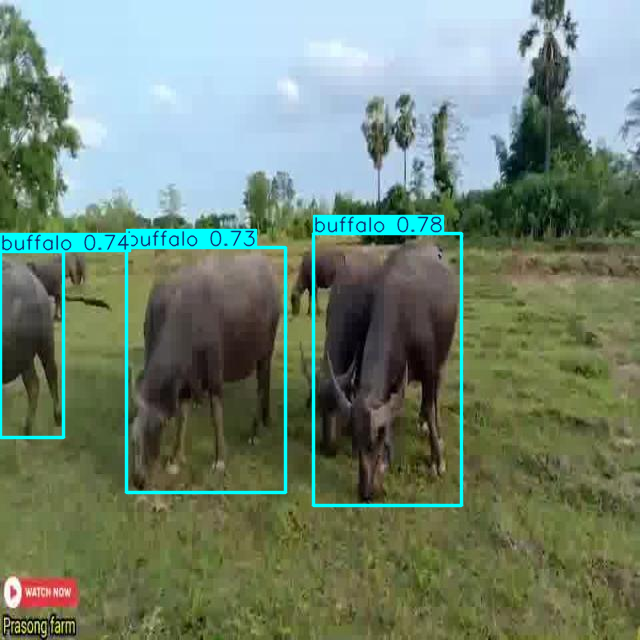

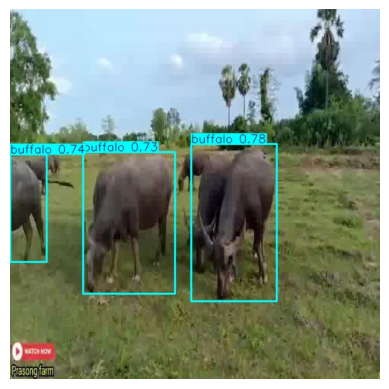

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load your trained model
model = YOLO("/kaggle/working/TrainingResults/animalDetection/weights/best.pt")  # Path to best model

# Path to a test image
image_path = "/kaggle/input/animal3/test/images/03879_jpg.rf.f559d42e5e1765a990e6f3c950850171.jpg"  # Change this to your test image path

# Run inference
results = model(image_path)

# Display the image with detections
for result in results:
    result.show()  # Show image with detections

# Save the output image (Optional)
result.save(filename="/kaggle/working/output.jpg")

# Load and display the output image
img = cv2.imread("/kaggle/working/output.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
